In [14]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from keras.models import Sequential,load_model
import keras

In [15]:
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

# Check if the file exists
file_path = '../datasets/emnist-letters-train.csv'
if os.path.isfile(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")

Current working directory: c:\Users\havva\Desktop\bitirme_kod\train
The file ../datasets/emnist-letters-train.csv exists.


In [16]:
train_images = pd.read_csv("../datasets/emnist-letters-train.csv",header=None)
test_images = pd.read_csv("../datasets/emnist-letters-test.csv",header=None)
map_images = pd.read_csv("../datasets/emnist-letters-mapping.txt",header=None) 


In [17]:
# Seperating labels from features in training and test data.
train_x = train_images.iloc[:,1:]  
train_y = train_images.iloc[:,0]  
train_x = train_x.values

test_x = test_images.iloc[:,1:]
test_y = test_images.iloc[:,0]
test_x = test_x.values


ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))

def rot_flip(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

train_x = np.apply_along_axis(rot_flip,1,train_x)
test_x = np.apply_along_axis(rot_flip,1,test_x)
# plt.imshow(train_x[2])
# train_x.shape

train_x = train_x.astype('float32')
train_x = train_x/255.0

test_x = test_x.astype('float32')
test_x = test_x/255.0

train_x = train_x.reshape(-1, 28,28, 1)   #Equivalent to (112800,28,28,1)
test_x = test_x.reshape(-1, 28,28, 1)   #Equivalent to (18800,28,28,1)

In [18]:
# CNN modeli oluşturma (BİZİM MODEL)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer = 'adam',loss= "sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 474,140 (1.81 MB)

 Trainable params: 474,140 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from keras.callbacks import EarlyStopping
# Early stopping geri çağrısını oluşturma
early_stopper = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


history = model.fit(
    train_x,
    train_y,
    validation_data = (test_x,test_y),
    epochs = 10, callbacks=[early_stopper]
)


Epoch 1/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 144s 51ms/step - accuracy: 0.4778 - loss: 1.7194 - val_accuracy: 0.8585 - val_loss: 0.3991
Epoch 2/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 138s 50ms/step - accuracy: 0.8772 - loss: 0.4189 - val_accuracy: 0.8978 - val_loss: 0.3258
Epoch 3/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 150s 54ms/step - accuracy: 0.9031 - loss: 0.3320 - val_accuracy: 0.9072 - val_loss: 0.2949
Epoch 4/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 150s 54ms/step - accuracy: 0.9117 - loss: 0.2979 - val_accuracy: 0.9158 - val_loss: 0.2767
Epoch 5/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 196s 52ms/step - accuracy: 0.9195 - loss: 0.2696 - val_accuracy: 0.9114 - val_loss: 0.2942
Epoch 6/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 143s 51ms/step - accuracy: 0.9266 - loss: 0.2485 - val_accuracy: 0.9162 - val_loss: 0.2749
Epoch 7/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 142s 51ms/step - accuracy: 0.9306 - loss: 0.2316 - val_accuracy: 0.9172 - val_loss: 0.2799
Epoch 8/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 146s 53ms/step - accuracy: 

In [21]:
model.save("../models/model_letters.h5")

ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

In [ ]:
# Adding character to associated ASCII Value
character = []
for i in ascii_map:
    character.append(chr(int(i)-1)) # int(i)-1  : -1 eklendi çünkü tahmin işleminde etiketlerde kayma vardı, gerçek etiket:A tahmin edilen:B oluyordu.

# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))
character = pd.DataFrame(character)


ascii_map = pd.DataFrame(ascii_map)
ascii_map["Character"] = character
ascii_map.to_csv("../mapping/emnist-letters-mapping.csv",index=False,header=True)

In [25]:
# Confusion Matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
y_pred = []
y_true = []

for x, y in test_x:
    batch_predictions = model.predict(x)
    y_pred.extend(np.argmax(batch_predictions, axis=1))
    y_true.extend(np.argmax(y, axis=1))
    if len(y_true) >= test_x.n:
        break

conf_matrix = tf.math.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=list(test_x.class_indices.keys()), yticklabels=list(test_x.class_indices.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

ValueError: too many values to unpack (expected 2)

In [36]:
# Model ile tahmin yapın
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
# Eğer y_test zaten etiketleri içeriyorsa (one-hot encoded değilse)
y_true = test_y

463/463 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step


In [37]:
# yeni model için 
# Metrikleri hesaplayın
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Detaylı sınıflandırma raporu
# print(classification_report(y_true, y_pred_classes))

Accuracy: 0.9283108108108108
Precision: 0.9397804271652805
Recall: 0.9283108108108108
F1 Score: 0.9305776430407163


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:

# Metrikleri hesaplayın
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Detaylı sınıflandırma raporu
# print(classification_report(y_true, y_pred_classes))

Accuracy: 0.9158783783783784
Precision: 0.9243126923985236
Recall: 0.9158783783783784
F1 Score: 0.9195354597034026


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


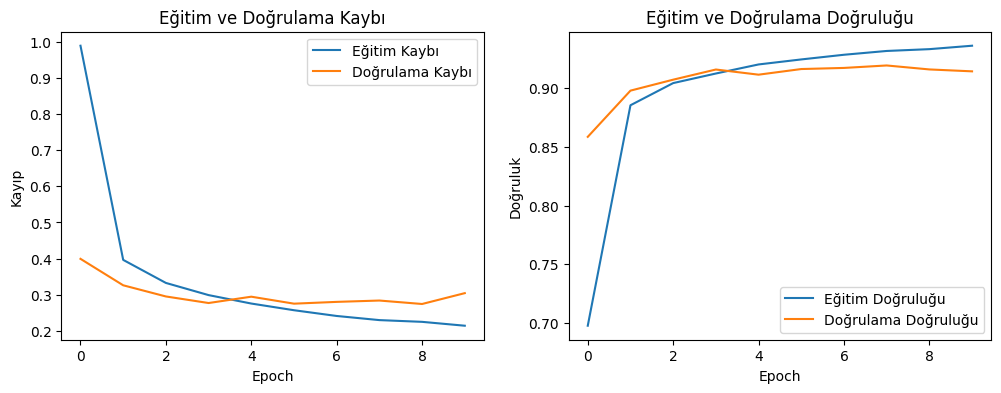

In [28]:
# history nesnesini eğitirken kaydedin
# history = model.fit(...)

# Kayıp ve doğruluk grafiklerini çizmek için
def plot_history(history):
    # Kayıp
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Eğitim Kaybı')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Kaybı')

    # Doğruluk
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
    plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    
    plt.show()

# history nesnesini kullanarak grafik çizme
plot_history(history)
